In [22]:
#This data pull from Understat comes directly from Tom Whelan(twhelan22: https://github.com/twhelan22)
#Import the libraries we need. You will likely need to download the Chrome webdriver to pull this data.
import pandas as pd
import random
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import datetime

#Select the Premier League URL from Understat and assign it to a variable
xg_url = 'https://understat.com/league/EPL'

#Use requests to download the website
xg_data = requests.get(xg_url)

#Get the code from the website in an html format
xg_html = xg_data.content

#Parse the html using beautifulsoup
soup = BeautifulSoup(xg_html, 'html.parser')

#Set up the Selenium driver (this example is for Chrome)
options = webdriver.ChromeOptions()

#'Headless' means it runs without opening a browser
options.add_argument('headless')

#Tell the Selenium driver to run
driver = webdriver.Chrome(executable_path=r"C:\Users\jpc31\eclipse-workspace\fantasyfutopia\chromedriver.exe")

#Tell the driver to go to the page url
driver.get(xg_url)

#Grab the html code from the website
soup = BeautifulSoup(driver.page_source, 'html.parser')

#Get the table headers using 3 chained find operations
#1. Find the div containing the table (div class = chemp jTable)
#2. Find the table within that div
#3. Find all 'th' elements where class = sort
headers = soup.find('div', attrs={'class':'chemp margin-top jTable'}).find('table').find_all('th',attrs={'class':'sort'})

#Print the headers
headers

[<th class="sort" data-num="0"><span>№</span></th>,
 <th class="sort" data-num="1"><span title="Team name">Team</span></th>,
 <th class="sort" data-num="2"><span title="Matches">M</span></th>,
 <th class="sort" data-num="3"><span title="Wins">W</span></th>,
 <th class="sort" data-num="4"><span title="Draws">D</span></th>,
 <th class="sort" data-num="5"><span title="Loses">L</span></th>,
 <th class="sort" data-num="6"><span title="Goals for">G</span></th>,
 <th class="sort" data-num="7"><span title="Goals againist">GA</span></th>,
 <th class="sort" data-num="8"><span title="Points">PTS</span></th>,
 <th class="sort" data-num="9"><span class="title-expected" title="Expected Goals for">xG</span></th>,
 <th class="sort" data-num="11"><span class="title-expected" title="Expected Goals againist">xGA</span></th>,
 <th class="sort" data-num="18"><span class="title-expected" title="Expected Points">xPTS</span></th>]

In [23]:
#Iterate over headers, get the text from each item, and add the results to headers_list
headers_list = []
for header in headers:
    headers_list.append(header.get_text(strip=True))
print(headers_list)

['№', 'Team', 'M', 'W', 'D', 'L', 'G', 'GA', 'PTS', 'xG', 'xGA', 'xPTS']


In [24]:
#Can also call elements like tables directly instead of using find('table')
body = soup.find("div",attrs={"class":"chemp margin-top jTable"}).table.tbody

#Create a master list for row data
all_rows_list = []
#For each row in the table body
for tr in body.find_all("tr"):
    #Get data from each cell in the row
    row = tr.find_all("td")
    #Create a list to save row data to
    current_row = []
    #For each in the row variable
    for item in row:
        #Add the text data to the current row list
        current_row.append(item.get_text(strip=True))
    #Add the current row data to the master list    
    all_rows_list.append(current_row)

#Create a dataframe where the rows = all_rows_list and columns=headers_list    
xg_df = pd.DataFrame(all_rows_list,columns=headers_list)
xg_df

,№,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS
0,1,Liverpool,29,27,1,1,66,21,82,61.03-4.97,28.69+7.69,59.81-22.19
1,2,Manchester City,28,18,3,7,68,31,57,73.08+5.08,27.87-3.13,63.21+6.21
2,3,Leicester,29,16,5,8,58,28,53,47.77-10.23,37.43+9.43,47.66-5.34
3,4,Chelsea,29,14,6,9,51,39,48,56.09+5.09,31.14-7.86,55.55+7.55
4,5,Manchester United,29,12,9,8,44,30,45,49.06+5.06,30.56+0.56,52.10+7.10
5,6,Wolverhampton Wanderers,29,10,13,6,41,34,43,44.62+3.62,31.31-2.69,49.26+6.26
6,7,Sheffield United,28,11,10,7,30,25,43,36.65+6.65,36.88+11.88,39.06-3.94
7,8,Tottenham,29,11,8,10,47,40,41,39.59-7.41,44.62+4.62,37.60-3.40
8,9,Arsenal,28,9,13,6,40,36,40,38.41-1.59,42.43+6.43,37.26-2.74
9,10,Burnley,29,11,6,12,34,40,39,40.37+6.37,40.53+0.53,39.57+0.57


In [25]:
#Change the name of No. to Position
xg_df = xg_df.rename(columns={'№': 'Position'})

In [26]:
#Inspecting what goal and xG data looks like
xg_df=xg_df[["Team","G","GA","xG","xGA"]]
xg_df.head()

#Goals data looks fine but xG data has this annoying +/- number showing teams performance between actual and expected goals
#Need to clean the xG data

,Team,G,GA,xG,xGA
0,Liverpool,66,21,61.03-4.97,28.69+7.69
1,Manchester City,68,31,73.08+5.08,27.87-3.13
2,Leicester,58,28,47.77-10.23,37.43+9.43
3,Chelsea,51,39,56.09+5.09,31.14-7.86
4,Manchester United,44,30,49.06+5.06,30.56+0.56


In [27]:
#Clean the xG total by keeping the first 5 charaters and converting the type to float to conduct analysis
xg_df["xG_regex"] = xg_df["xG"].str[0:5].astype(float)
xg_df["xGA_regex"] = xg_df["xGA"].str[0:5].astype(float)

#Add the additional columns required for analysis
xg_df["GD"] = xg_df["G"].astype(float) - xg_df["GA"].astype(float)
xg_df["xGD"] = xg_df["xG_regex"] - xg_df["xGA_regex"]
xg_df["xG_diff"] = xg_df["G"].astype(float) - xg_df["xG_regex"]
xg_df["xGA_diff"] = xg_df["GA"].astype(float) - xg_df["xGA_regex"]
xg_df["xGD_diff"] = xg_df["GD"] - xg_df["xGD"]

#Inspect the new data
xg_df.head()

,Team,G,GA,xG,xGA,xG_regex,xGA_regex,GD,xGD,xG_diff,xGA_diff,xGD_diff
0,Liverpool,66,21,61.03-4.97,28.69+7.69,61.03,28.69,45.0,32.34,4.97,-7.69,12.66
1,Manchester City,68,31,73.08+5.08,27.87-3.13,73.08,27.87,37.0,45.21,-5.08,3.13,-8.21
2,Leicester,58,28,47.77-10.23,37.43+9.43,47.77,37.43,30.0,10.34,10.23,-9.43,19.66
3,Chelsea,51,39,56.09+5.09,31.14-7.86,56.09,31.14,12.0,24.95,-5.09,7.86,-12.95
4,Manchester United,44,30,49.06+5.06,30.56+0.56,49.06,30.56,14.0,18.50,-5.06,-0.56,-4.50


In [28]:
#Create the dataframe with only the necessary columns
xg_df=xg_df[["Team","G","GA","GD","xG_regex","xGA_regex","xGD","xG_diff","xGA_diff","xGD_diff"]]
xg_df

,Team,G,GA,GD,xG_regex,xGA_regex,xGD,xG_diff,xGA_diff,xGD_diff
0,Liverpool,66,21,45.0,61.03,28.69,32.34,4.97,-7.69,12.66
1,Manchester City,68,31,37.0,73.08,27.87,45.21,-5.08,3.13,-8.21
2,Leicester,58,28,30.0,47.77,37.43,10.34,10.23,-9.43,19.66
3,Chelsea,51,39,12.0,56.09,31.14,24.95,-5.09,7.86,-12.95
4,Manchester United,44,30,14.0,49.06,30.56,18.50,-5.06,-0.56,-4.50
5,Wolverhampton Wanderers,41,34,7.0,44.62,31.31,13.31,-3.62,2.69,-6.31
6,Sheffield United,30,25,5.0,36.65,36.88,-0.23,-6.65,-11.88,5.23
7,Tottenham,47,40,7.0,39.59,44.62,-5.03,7.41,-4.62,12.03
8,Arsenal,40,36,4.0,38.41,42.43,-4.02,1.59,-6.43,8.02
9,Burnley,34,40,-6.0,40.37,40.53,-0.16,-6.37,-0.53,-5.84


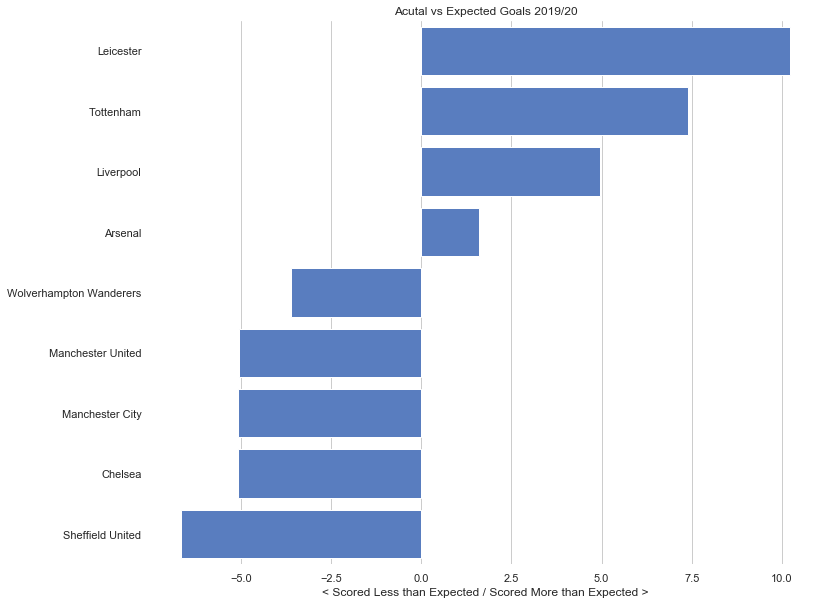

In [30]:
#Import the visualisation modules
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Define a new dataframe based on the top 9 teams
xg_df1 = xg_df.iloc[0:9]
#Sort these teams by xG scored vs actual goals scored
xg_df1 = xg_df1.sort_values(by=["xG_diff"],ascending=False)

#Create the mapping for the bars
sns.set(style="whitegrid")
sns.set_color_codes("muted")
f, ax = plt.subplots(figsize=(12, 10))

#Plot the barchart with the data
sns.barplot(x="xG_diff", y="Team", data=xg_df1, color="b")

#Label the axis
ax.set(ylabel="",xlabel="< Scored Less than Expected / Scored More than Expected >",title="Acutal vs Expected Goals 2019/20")

#Show the barchart
sns.despine(left=True, bottom=True)

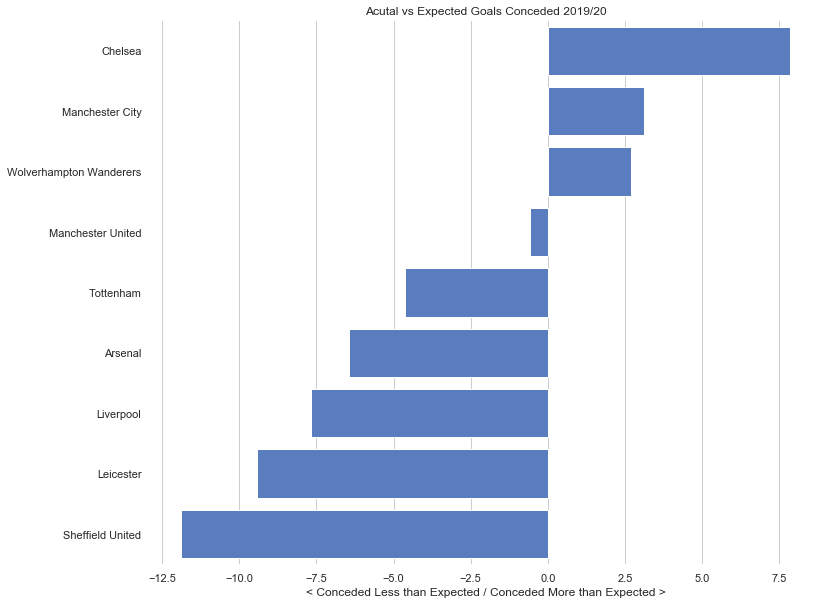

In [31]:
#Create the mapping for the bars
f, ax = plt.subplots(figsize=(12, 10))

#Sort the top 9 teams by xG against vs actual goals conceded
xg_df1 = xg_df1.sort_values(by=["xGA_diff"],ascending=False)

#Plot the barchart with the data
sns.barplot(x="xGA_diff", y="Team", data=xg_df1, color="b")

#Label the axis
ax.set(ylabel="",xlabel="< Conceded Less than Expected / Conceded More than Expected >",title="Acutal vs Expected Goals Conceded 2019/20")

#Show the barchart
sns.despine(left=True, bottom=True)

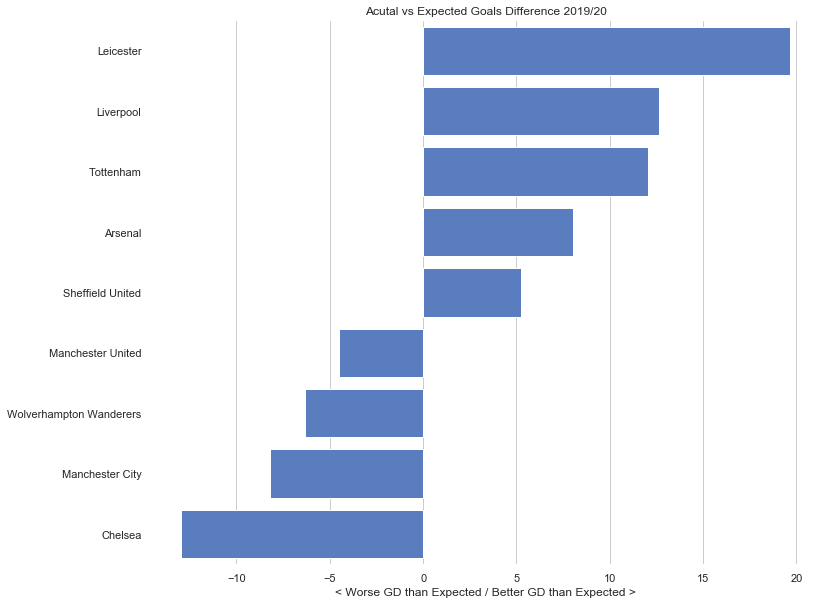

In [32]:
#Create the mapping for the bars
f, ax = plt.subplots(figsize=(12, 10))

#Sort the top 9 teams by xG goal difference vs actual goals difference
xg_df1 = xg_df1.sort_values(by=["xGD_diff"],ascending=False)

#Plot the barchart with the data
sns.barplot(x="xGD_diff", y="Team", data=xg_df1, color="b")

#Label the axis
ax.set(ylabel="",xlabel="< Worse GD than Expected / Better GD than Expected >",title="Acutal vs Expected Goals Difference 2019/20")

#Show the barchart
sns.despine(left=True, bottom=True)

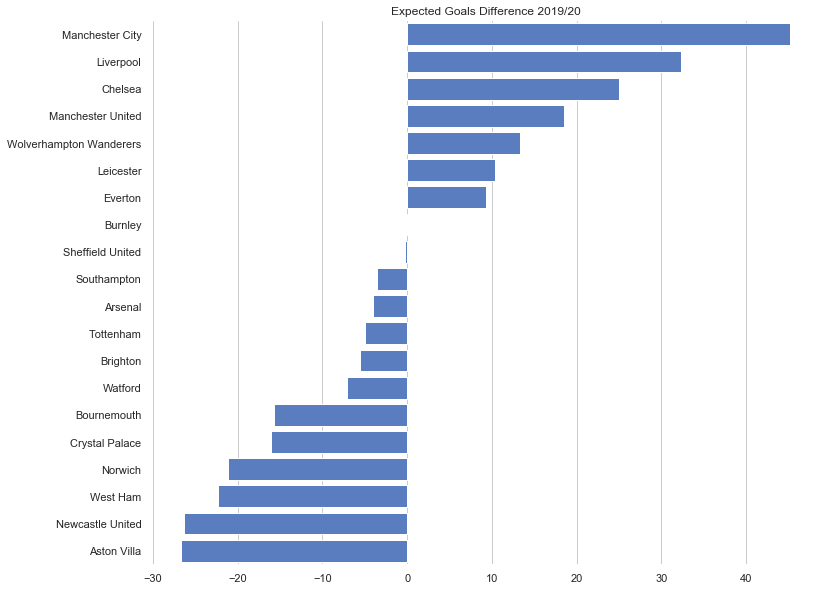

In [70]:
#Create the mapping for the bars
f, ax = plt.subplots(figsize=(12, 10))

#Sort the all teams by goal difference using xG
xg_df = xg_df.sort_values(by=["xGD"],ascending=False)

#Plot the barchart with the data
sns.barplot(x="xGD", y="Team", data=xg_df, color="b")

#Label the axis
ax.set(ylabel="",xlabel="",title="Expected Goals Difference 2019/20")

#Show the barchart
sns.despine(left=True, bottom=True)